# Successive halving
---------------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the california housing dataset from [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
from sklearn.datasets import fetch_california_housing
from atom import ATOMRegressor

In [2]:
# Load the data
X, y = fetch_california_housing(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (20640, 9)
Memory: 1.49 MB
Scaled: False
Outlier values: 799 (0.5%)
-------------------------------------
Train set size: 16512
Test set size: 4128



In [4]:
# Compare tree-based models via successive halving
atom.successive_halving(
    models=["Tree", "Bag", "ET", "RF", "LGB", "CatB"],
    metric="mae",
    n_bootstrap=5,
)



Run: 0 ================================ >>
Models: Tree6, Bag6, ET6, RF6, LGB6, CatB6
Size of training set: 16512 (17%)
Size of test set: 4128

Training ========================= >>
Metric: neg_mean_absolute_error


Results for Decision Tree:
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.0
Test evaluation --> neg_mean_absolute_error: -0.5598
Time elapsed: 0.029s
Bootstrap ---------------------------------------
Evaluation --> neg_mean_absolute_error: -0.546 ± 0.0081
Time elapsed: 0.272s
-------------------------------------------------
Total time: 0.301s


Results for Bagging:
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.1649
Test evaluation --> neg_mean_absolute_error: -0.4074
Time elapsed: 0.129s
Bootstrap ---------------------------------------
Evaluation --> neg_mean_absolute_error: -0.4145 ± 0.0081
Time elapsed: 0.727s
-------------------------------------------------
Total

## Analyze results

In [5]:
# The results is now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the number of models fitted during that run
atom.results

metric_train  metric_test time_fit  mean_bootstrap  std_bootstrap  \
frac model                                                                      
0.17 Bag6  -1.649188e-01    -0.407445   0.129s       -0.414546       0.008140   
     CatB6 -2.320437e-01    -0.293153   3.614s       -0.340974       0.000769   
     ET6   -2.544643e-15    -0.357537   0.614s       -0.383449       0.000824   
     LGB6  -2.310124e-01    -0.327832   0.169s       -0.354878       0.002439   
     RF6   -1.457109e-01    -0.390478   1.501s       -0.396854       0.004553   
     Tree6 -3.324214e-17    -0.559810   0.029s       -0.545994       0.008073   
0.33 CatB3 -2.320437e-01    -0.293153   3.657s       -0.322100       0.001936   
     ET3   -2.544643e-15    -0.357537   1.122s       -0.368461       0.003350   
     LGB3  -2.310124e-01    -0.327832   0.196s       -0.335865       0.003234   
1.00 CatB1 -2.320437e-01    -0.293153   5.198s       -0.302825       0.001575   

           time_bootstrap     time  
frac model                          
0.17 Bag6          0.727s   0.856s  
     CatB6        16.632s  20.247s  
     ET6           2.777s   3.392s  
     LGB6          0.728s   0.897s  
     RF6           6.015s   7.517s  
     Tree6         0.272s   0.301s  
0.33 CatB3        17.658s  21.317s  
     ET3           4.926s   6.051s  
     LGB3          0.868s   1.065s  
1.00 CatB1        25.625s  30.824s

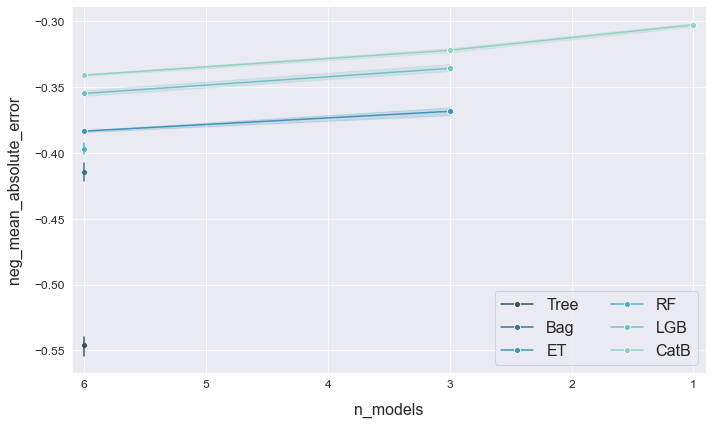

In [6]:
# Plot the successive halving's results
atom.plot_successive_halving()

In [7]:
# Use an acronym to call all the models with the same estimator
atom.plot_errors(models=["CatB"])

In [8]:
# Use the number to call the models from the same run
atom.plot_errors(models="3")